### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Import dataset

In [3]:
data = os.path.join(os.getcwd(), "datasets", "adult.csv")
df = pd.read_csv(data, header=None, sep=",\s")

### Exploratory data analysis

In [4]:
# view dimensions of dataset

df.shape

(32561, 15)

#### View top 5 rows of dataset

In [5]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Rename column names

In [6]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
# let's again preview the dataset

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### View summary of dataset

In [8]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


#### Explore categorical variables

In [10]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print(f"There are {len(categorical)} categorical variables \n")

print('The categorical variables are :\n\n', categorical)


There are 9 categorical variables 

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [11]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


#### Explore problems within categorical variables

##### Missing values in categorical variables

In [12]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

#### Frequency counts of categorical variables

In [13]:
# view frequency counts of values in categorical variables

for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

#### Explore workclass variable

In [14]:
# check labels in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [16]:
# replace '?' values in workclass variable with `NaN`

df['workclass'].replace("?", np.NaN, inplace=True)

In [17]:
# again check the frequency distribution of values in workclass variable

df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

#### Explore occupation variable

In [18]:
# check labels in occupation variable

df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [20]:
# replace '?' values in occupation variable with `NaN`

df['occupation'].replace("?", np.NaN, inplace=True)

In [21]:
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

#### Explore native_country variable

In [23]:
# check labels in native_country variable

df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [24]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [25]:
# replace '?' values in native_country variable with `NaN`

df['native_country'].replace("?", np.NaN, inplace=True)

In [26]:
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

##### Check missing values in categorical variables again

In [28]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

#### Number of labels: cardinality

In [29]:
# check for cardinality in categorical variables

for var in categorical:

    print(var, ' contains ', len(df[var].unique()), ' labels ')

workclass  contains  9  labels 
education  contains  16  labels 
marital_status  contains  7  labels 
occupation  contains  15  labels 
relationship  contains  6  labels 
race  contains  5  labels 
sex  contains  2  labels 
native_country  contains  42  labels 
income  contains  2  labels 


#### Explore Numerical Variables

In [31]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype != "O"]

print(f"There are {len(numerical)} numerical variables\n")

print(f"The numerical variables are : {numerical}")

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [32]:
# view the numerical variables

df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


#### Explore problems within numerical variables

##### Missing values in numerical variables

In [33]:
# check missing values in numerical variables

df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

#### Declare feature vector and target variable

In [34]:
X = df.drop(['income'], axis=1)

y = df['income']

##### Split data into separate training and test set

In [35]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [36]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((26048, 14), (6513, 14))

#### Feature Engineering

In [37]:
# check data types in X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [38]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == "O"]

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [39]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != "O"]

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

##### Engineering missing values in categorical variables

In [41]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

workclass         0.055974
education         0.000000
marital_status    0.000000
occupation        0.056204
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018312
dtype: float64

In [42]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean() > 0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.05597358722358722
occupation 0.056203931203931204
native_country 0.018312346437346437


In [43]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [44]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [45]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [46]:
# check missing values in X_train

X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [47]:
# check missing values in X_test

X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

#### Encode categorical variables

In [48]:
# print categorical variables

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [49]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
15282,Private,11th,Divorced,Transport-moving,Not-in-family,White,Male,United-States
24870,Private,HS-grad,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
18822,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Female,United-States
26404,Private,HS-grad,Married-civ-spouse,Sales,Wife,Black,Female,United-States
7842,Self-emp-not-inc,Assoc-voc,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


In [50]:
# import category encoders

import category_encoders as ce

In [51]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [52]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15282,36,1,0,0,0,0,0,0,0,174308,...,0,0,0,0,0,0,0,0,0,0
24870,35,1,0,0,0,0,0,0,0,198202,...,0,0,0,0,0,0,0,0,0,0
18822,38,1,0,0,0,0,0,0,0,52963,...,0,0,0,0,0,0,0,0,0,0
26404,50,1,0,0,0,0,0,0,0,138270,...,0,0,0,0,0,0,0,0,0,0
7842,68,0,1,0,0,0,0,0,0,116903,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_train.shape

(26048, 105)

In [54]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [55]:
X_test.shape

(6513, 105)

#### Feature Scaling

In [56]:
cols = X_train.columns

In [57]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [58]:
X_train

array([[-0.05263158,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10526316,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.05263158,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.73684211,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.42105263, -1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63157895,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [59]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [60]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [61]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.030971,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.105263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.169550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.052632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.049314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.684211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.333407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.631579,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.512721,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Model training

In [62]:
# train a Gaussian Naive Bayes classifier on the training set

from sklearn.naive_bayes import GaussianNB

# instantiate the model

gnb = GaussianNB()

In [63]:
# Apply GaussianNB with grid search and print results with the best estimator

from sklearn.model_selection import GridSearchCV

param_grid = {'var_smoothing': np.logspace(0,-9, num=100)}

grid = GridSearchCV(estimator=gnb,
                    param_grid=param_grid,
                    cv=5,
                    verbose=1,
                    scoring='accuracy')


# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

best_nv=grid.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 3.5111917342151273e-09}
GaussianNB(var_smoothing=3.5111917342151273e-09)


#### Predict the results

In [64]:
y_pred = best_nv.predict(X_test)

y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '<=50K'],
      dtype='<U5')

#### Check accuracy score

In [65]:
from sklearn.metrics import accuracy_score

print(f"Model accuracy score: {accuracy_score(y_test, y_pred):.4f}")

Model accuracy score: 0.8270


#### Check for overfitting and underfitting

In [66]:
# print the scores on training and test set

print(f"Training set score: {best_nv.score(X_train, y_train):.4f}")

print(f"Test set score: {best_nv.score(X_test, y_test):.4f}")

Training set score: 0.8294
Test set score: 0.8270


#### Confusion matrix

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

<Axes: >

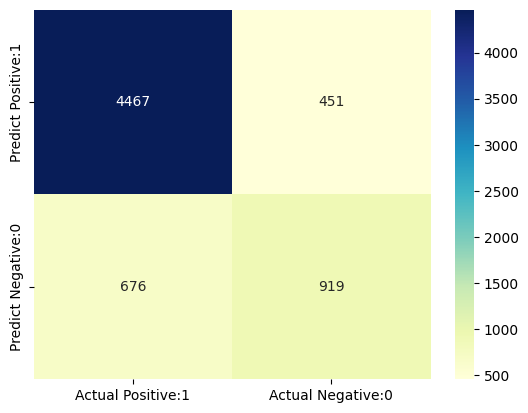

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification metrices

##### Classification Report

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

       <=50K     0.8686    0.9083    0.8880      4918
        >50K     0.6708    0.5762    0.6199      1595

    accuracy                         0.8270      6513
   macro avg     0.7697    0.7422    0.7539      6513
weighted avg     0.8201    0.8270    0.8223      6513

